(512, 820)


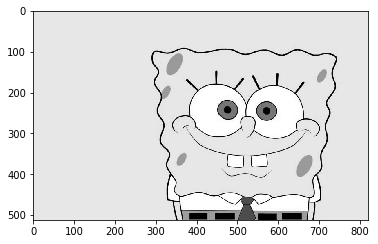

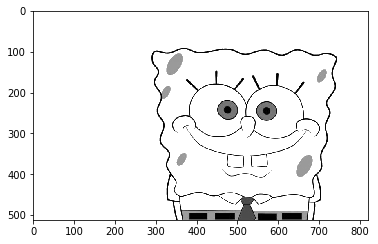

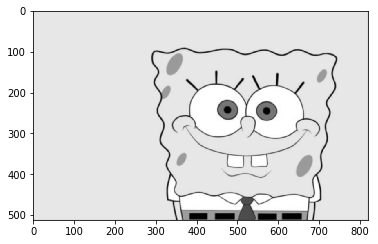

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pylab
picture=Image.open(r'C:\Users\Administrator\Desktop\自我思考\123123.jpeg').convert('L')
matrix = np.asarray(picture)
print(matrix.shape)
plt.imshow(picture,cmap='gray')
pylab.show()
inverse=matrix.copy()
inverse[inverse>200]=255
picture_1=Image.fromarray(inverse)
plt.imshow(picture_1,cmap='gray')
pylab.show()
#Sobel边缘检测算法
def gauss_kernel(size,sigmal=1):
    size=int(size)//2
    x,y=np.mgrid[-size:size+1,-size:size+1]
    normal=1/(2.0*np.pi*sigmal**2)
    g=np.exp(-((x**2+y**2)/(2.0*sigmal**2)))*normal
    return g
a=gauss_kernel(5)
def zeros_extend(a,w=1,h=1):
    a=np.row_stack((np.row_stack((np.zeros([w,a.shape[1]],dtype=np.float64),a)),np.zeros([w,a.shape[1]],dtype=np.float64)))
    a=np.column_stack((np.column_stack((np.zeros([a.shape[0],h]),a)),np.zeros([a.shape[0],h])))
    return a
def convolution(matrix,operator):
    matrix_ex=zeros_extend(matrix,int(((operator.shape[1]-1)/2)),int(((operator.shape[1]-1)/2)))
    matrix_zeros=np.zeros([matrix.shape[0],matrix.shape[1]],dtype=np.float64)
    for i in range(matrix_zeros.shape[0]):
        for j in range(matrix_zeros.shape[1]):
            matrix_zeros[i,j]=np.sum(matrix_ex[0+i:(operator.shape[1]+i),0+j:(operator.shape[1]+j)]*operator)
    return  matrix_zeros
new_picture=convolution(matrix,a)
np.savetxt(r'C:\Users\Administrator\Desktop\ZYJ\guass.csv',new_picture, delimiter = ',')
new_picture=Image.fromarray(new_picture)
plt.imshow(new_picture,cmap='gray')
plt.savefig(r'C:\Users\Administrator\Desktop\ZYJ\guass.jpg')
pylab.show()

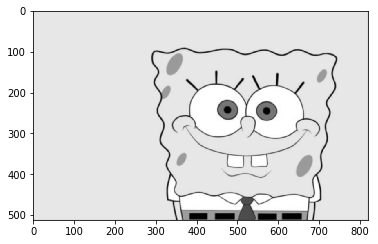

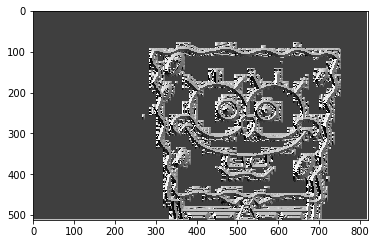

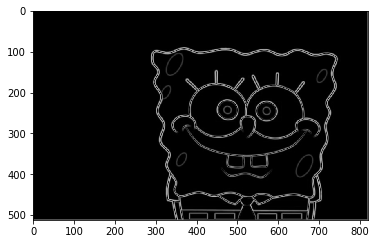

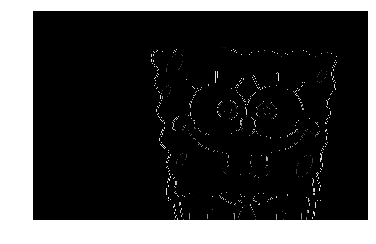

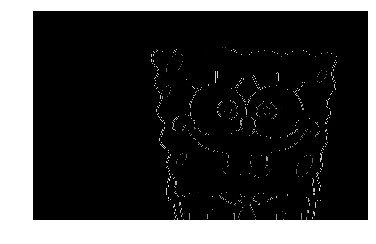

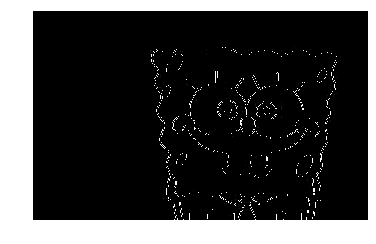

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mim
import pylab
pictrue=np.loadtxt(r'C:\Users\Administrator\Desktop\ZYJ\guass.csv',delimiter=',')
pictrue = np.asarray(pictrue)
plt.imshow(pictrue,cmap='gray')
pylab.show()
def zeros_extend(a,w=1,h=1):
    a=np.row_stack((np.row_stack((np.zeros([w,a.shape[1]],dtype=np.float64),a)),np.zeros([w,a.shape[1]],dtype=np.float64)))
    a=np.column_stack((np.column_stack((np.zeros([a.shape[0],h]),a)),np.zeros([a.shape[0],h])))
    return a
def convolution(matrix,operator):
    matrix_ex=zeros_extend(matrix,int(((operator.shape[1]-1)/2)),int(((operator.shape[1]-1)/2)))
    matrix_zeros=np.zeros([matrix.shape[0],matrix.shape[1]],dtype=np.float64)
    for i in range(matrix_zeros.shape[0]):
        for j in range(matrix_zeros.shape[1]):
            matrix_zeros[i,j]=np.sum(matrix_ex[0+i:(operator.shape[1]+i),0+j:(operator.shape[1]+j)]*operator)
    return  matrix_zeros
pylab.show()
def Sobel_filters(img):
    sobel_gx=np.array([[-1,0,1],[-2,0,2],[-1,0,+1]])
    sobel_gy=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    img_x= convolution(img,sobel_gx)
    img_y= convolution(img,sobel_gy)
    G=np.hypot(img_x,img_y)
    G=(G/(G.max()))*255
    theta=np.arctan2(img_y,img_x)
    return (G,theta)
pictrue_g,pictrue_theta=Sobel_filters(pictrue) 
plt.imshow(pictrue_theta,cmap='gray')
pylab.show()
plt.imshow(pictrue_g,cmap='gray')
#plt.savefig(r'C:\Users\Administrator\Desktop\ZYJ\Sobel.jpg')
pylab.show()
def self_composition(a):
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            if a[i,j]>=128:
                a[i,j]=((a[i,j])**2)/128
            else:
                a[i,j]=255-((255-a[i,j])**2)/128           
    return a
def mappping_pic(a):
    max_img=a.max()
    min_img=a.min()
    interval=max_img-min_img
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            a[i,j]=((a[i,j]-min_img)/interval)*255
    return a
def composition(a):
    a=self_composition(a)
    a=mappping_pic(a)
    return a
def mat_int(a):
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            a[i,j]=int(a[i,j])
    return a
def no_max_suppression(a,theta):
    m,n=a.shape
    new_m=np.zeros([m,n],dtype=np.int32)
    theta_r=(theta*180.0)/np.pi
    theta[theta<0]+=180
    for i in range(1,m-1):
        for j in range(1,n-1):
            if (0<=theta[i,j]<22.5) or (157.5<=theta[i,j]<=180):
                q=a[i,j+1]
                r=a[i,j-1]
            elif (22.5<=theta[i,j]<67.5):
                q=a[i+1,j-1]
                r=a[i-1,j+1]
            elif (67.5<=theta[i,j]<112.5):
                q=a[i+1,j]
                r=a[i-1,j]
            elif (112.5<=theta[i,j]<157.5):
                q=a[i+1,j+1]
                r=a[i-1,j-1]
            if (a[i,j]>q) and (a[i,j]>r):
                new_m[i,j]=a[i,j]
            else:
                new_m[i,j]=0
    return new_m
def double_threshold(img,lowt_ratio=0.05,hight_ratio=0.09):
    high_t=img.max()*hight_ratio
    low_t=high_t*lowt_ratio
    m,n=img.shape
    new_m=np.zeros([m,n],dtype=np.int32)
    weak=np.int(25)
    strong=np.int(255)
    strong_i,strong_j=np.where(img>=high_t)
    zero_i,zero_j=np.where(img<low_t)
    weak_i,weak_j=np.where((low_t<=img)&(img<high_t))
    new_m[strong_i,strong_j]=strong
    new_m[weak_i,weak_j]=weak
    return (new_m,weak,strong)
pictrue_g=mat_int(pictrue_g)
pictrue_g_n=no_max_suppression(pictrue_g,pictrue_theta)
plt.axis('off')
plt.imshow(pictrue_g_n,cmap='gray')
plt.show()
pictrue_g_sc=composition(composition(composition(pictrue_g_n)))
pictrue_g_sc=mat_int(pictrue_g_sc)
plt.axis('off')
plt.imshow(pictrue_g_sc,cmap='gray')
#plt.savefig(r'C:\Users\Administrator\Desktop\ZYJ\Sobel_s_y_t_max.jpg',bbox_inches='tight')
plt.show()
pictrue_g_sc_dt=double_threshold(pictrue_g_sc)[0]
plt.axis('off')
plt.imshow(pictrue_g_sc_dt,cmap='gray')
plt.show()
#pictrue_g_sc=Image.fromarray(pictrue_g_sc)
#pictrue_g_sc.show()
#pictrue_g=Image.fromarray(pictrue_g)
#pictrue_g.show()
#plt.imshow(pictrue_g_sc,cmap='gray')
#pylab.show()